Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

**Бинаризация по порогу**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [2]:
img = imageio.imread('flowers.jpg')
img = img.astype(np.float32) / 255.

In [3]:
img.shape

(1496, 2256, 3)

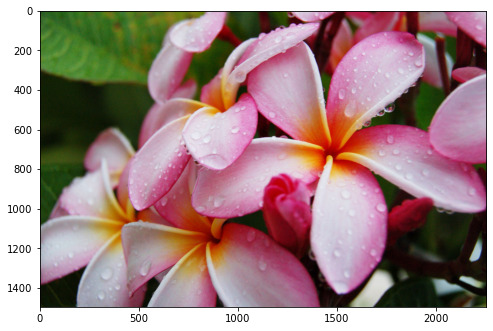

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [7]:
threshold = 0.65 # порог бинаризации
img_bw = np.mean(img, axis=2)
img_bin = (img_bw > threshold).astype(np.uint8)

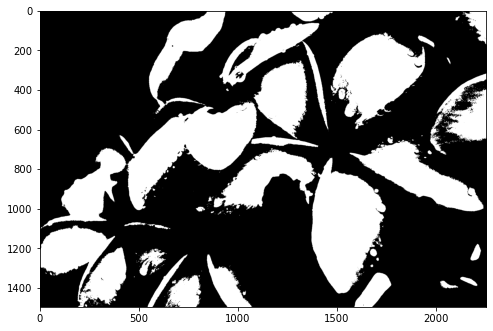

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bin*255, cmap='gray')

**Квантизация**

Уменьшим исходную градацию каждого цвета с 255 до нами заданного количества.


In [10]:
n = 3
n_colors = n*n*n
original = imageio.imread('flowers.jpg')
arr = original.reshape((-1, 3))

borders = []
centers = []
borders.append(0)
for i in range(1,n):
    c = int(255/n*i-+int(255/2/n))
    centers.append(c)
    b = int(255/n*i)
    borders.append(b)

c = int(255/n*i)+int(255/2/n)
centers.append(c)
borders.append(255)

centers, borders

([43, 128, 212], [0, 85, 170, 255])

In [11]:
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        for k in range(1, len(borders)):
            if (arr[i][j] > borders[k-1]) and (arr[i][j] <= borders[k]):
                arr[i][j] = centers[k-1]

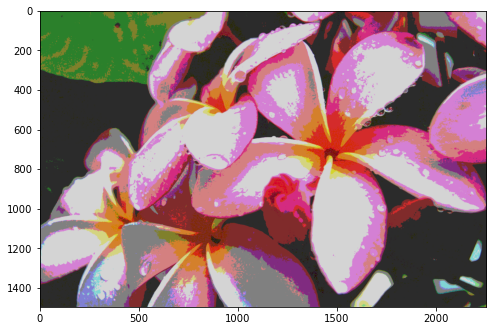

In [12]:
less_colors = arr.reshape(original.shape).astype('uint8')

plt.figure(figsize=(8, 8))
plt.imshow(less_colors)